# Word2Vec Clustering

In [3]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import pandas as pd

df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(df_ori.shape[0]-df.shape[0]))
df['jobpost_token'] = df.jobpost.map(word_tokenize)

print(df['jobpost_token'])


(19001, 24)
(18892, 24)
Removed 109 duplicates (based on jobpost + Title)
0        [AMERIA, Investment, Consulting, Company, JOB,...
1        [International, Research, &, Exchanges, Board,...
2        [Caucasus, Environmental, NGO, Network, (, CEN...
3        [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4        [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
5        [Boutique, ``, Appollo, '', JOB, TITLE, :, Sal...
6        [OSI, Assistance, Foundation, -, Armenian, Bra...
7        [International, Research, &, Exchanges, Board,...
8        [Yerevan, Brandy, Company, JOB, TITLE, :, Assi...
9        [American, Embassy, Yerevan, ANNOUNCEMENT, NUM...
10       [International, Research, &, Exchanges, Board,...
11       [International, Research, &, Exchanges, Board,...
12       [Institute, for, Sustainable, Communities, (, ...
13       [Food, Security, Regional, Cooperation, and, S...
14       [Teleplus, LLC, JOB, TITLE, :, General, Manage...
15       [NetCall, Communications, JOB, T

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
from gensim.models import Word2Vec
model = Word2Vec(df['jobpost_token'], min_count=1)

In [5]:
word2vec_dict = {}
words = model.wv.index2word  # order from model.wv.syn0

In [6]:
print(words)

['and', '--', '-', ',', 'the', ':', ';', 'of', '.', 'in', 'to', 'for', 'a', 'with', 'your', 'or', ')', 'is', '(', 'mention', 'website', 'Armenia', 'job', 'APPLICATION', 'www.careercenter.am', 'JOB', 'other', 'an', 'skills', 'be', 'will', 'Please', "''", 'experience', '``', 'that', 'as', 'on', 'work', 'you', 'knowledge', 'application', 'this', 'Yerevan', 'organization', 'its', 'through', 'The', 'letter', 'To', 'English', 'Center', 'opportunities', 'clearly', 'candidates', 'Career', 'available', 'opportunity', 'follow', 'development', 'place', 'are', 'free', 'link', 'learned', 'posting', 'URL', 'TITLE', 'Thanks', 'DESCRIPTION', 'LOCATION', 'DEADLINE', 'PROCEDURES', '@', '...', 'Announcement', 'career-related', 'Post', 'just', 'go', 'QUALIFICATIONS', 'REQUIRED', 'DATE', 'OPENING', 'Armenian', 'Ability', 'RESPONSIBILITIES', 'by', 'position', 'management', 'Excellent', 'Knowledge', 'ABOUT', 'company', 'years', 'information', 'COMPANY', 'all', 'languages', 'team', 'Good', 'language', 'please

In [11]:
vector = model.wv['SD']
print(vector.shape)

(100,)


In [20]:
#for row in df['jobpost_token']:

import numpy as np
jobpost_token_vec = []

for row in df['jobpost_token']:
    vector_sum = np.array(100)
    for token in row:
        vector_sum = vector_sum + model.wv[token]
    row_vec = vector_sum / len(row)
    jobpost_token_vec.append(row_vec)

print(jobpost_token_vec[0])

[-4.2242822e-01 -2.9576743e-01 -7.0978373e-02 -7.1366781e-01
 -1.9684781e-01 -4.5797157e-01 -8.8713217e-01  6.6788381e-01
 -1.0956484e+00 -1.1225759e+00  6.6644974e-02  4.0783679e-01
  7.6513124e-01  5.0829109e-02 -6.5342379e-01  6.0716981e-01
  1.5637054e+00  1.0250876e+00 -1.2466744e+00 -1.4336713e-01
  6.7895484e-01 -2.9855061e-01  4.6730778e-01 -1.6883142e-01
 -8.8022006e-01  3.1899685e-01  3.3696222e-01 -4.0822884e-01
  6.3265032e-01 -7.8274906e-02  1.4583334e+00 -3.9756581e-01
 -5.2190922e-02  5.5162340e-01  3.6177814e-01  6.6931516e-02
 -3.1483668e-01 -3.6981469e-01 -3.2785428e-01  1.1090398e+00
 -6.1067104e-01  2.1387279e-01  7.0455253e-02  1.2565299e+00
 -6.6099352e-01  1.2293241e+00  1.3389327e-02 -2.0663482e-01
 -5.4375255e-01  3.6784753e-01  2.1422414e-01 -7.6785564e-01
 -1.3349043e+00 -8.8342547e-01 -8.0217165e-01 -7.1820593e-01
 -5.5552912e-01 -7.2813195e-01  3.4429255e-01  7.9892832e-01
 -4.9963242e-01 -6.4392793e-01  5.0882095e-01 -9.1019034e-01
  7.4155861e-01 -3.35779

In [21]:
jobpost_token_vec = np.array(jobpost_token_vec)

In [22]:
jobpost_token_vec.shape

(18892, 100)

In [29]:
from sklearn.cluster import KMeans
from sklearn import metrics

def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++')
    idx = kmeans_clustering.fit_predict(word_vectors)
    return kmeans_clustering.cluster_centers_, idx

centers, clusters = clustering_on_wordvecs(jobpost_token_vec, 10)

In [35]:
from sklearn.neighbors import KDTree;

def get_top_documents(k, centers, wordvecs):
    tree = KDTree(wordvecs);
    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
    print(closest_words_idxs)
    return closest_words_idxs
    #Word Index is queried for each position in the above array, and added to a Dictionary.
#    closest_words = {};
#     for i in range(0, len(closest_words_idxs)):
#         closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#     #A DataFrame is generated from the dictionary.
#     df = pd.DataFrame(closest_words);
#     df.index = df.index+1
#    return df;

In [36]:
top10docclusters = get_top_documents(10, centers, jobpost_token_vec)

[array([[  871,   866, 12979,   870,   869,   873,   872, 15326, 17607,
         4247]]), array([[10294,  5980,  5690,  6600, 13732,  6491,  3946,  7151, 14229,
         7195]]), array([[2296, 2378, 5937, 2446, 2302, 2390,  563,  283,  653,  238]]), array([[ 8712, 15413, 17688,  6628, 16001, 14225,  5406, 12908, 18841,
         5874]]), array([[15275, 17875,  5859,  5771, 10782,  2867,  1219, 10081, 18098,
         5281]]), array([[ 8110, 16728,  9857, 18541,  1790, 15822, 16967, 11084,  8529,
         9845]]), array([[ 2989,  1071,  3264, 13586,  6288,   909, 15896,  3723,  7260,
         7140]]), array([[ 9707, 11155, 10842, 12890, 18844, 18290,  9977, 10172, 13218,
        13172]]), array([[15358, 11760, 16845, 14451, 17072,  7437, 16098, 16385, 14205,
        16707]]), array([[16701, 15489, 18175, 16753, 14309, 18192, 16529, 14324,  5981,
        16349]])]


In [41]:
top10docclusters = np.array(top10docclusters).squeeze()
top10docclusters.shape
print(top10docclusters[0])

[  871   866 12979   870   869   873   872 15326 17607  4247]


In [42]:
cluster0_tokens = []
for docidx in top10docclusters[0]:
    cluster0_tokens = cluster0_tokens + df['jobpost_token'][docidx]

In [49]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_lem if len(t) >= 3]  # simple way to remove the offending " punctuations
    return tokens_clean

def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  # case sensitive!
    fd.plot(50)

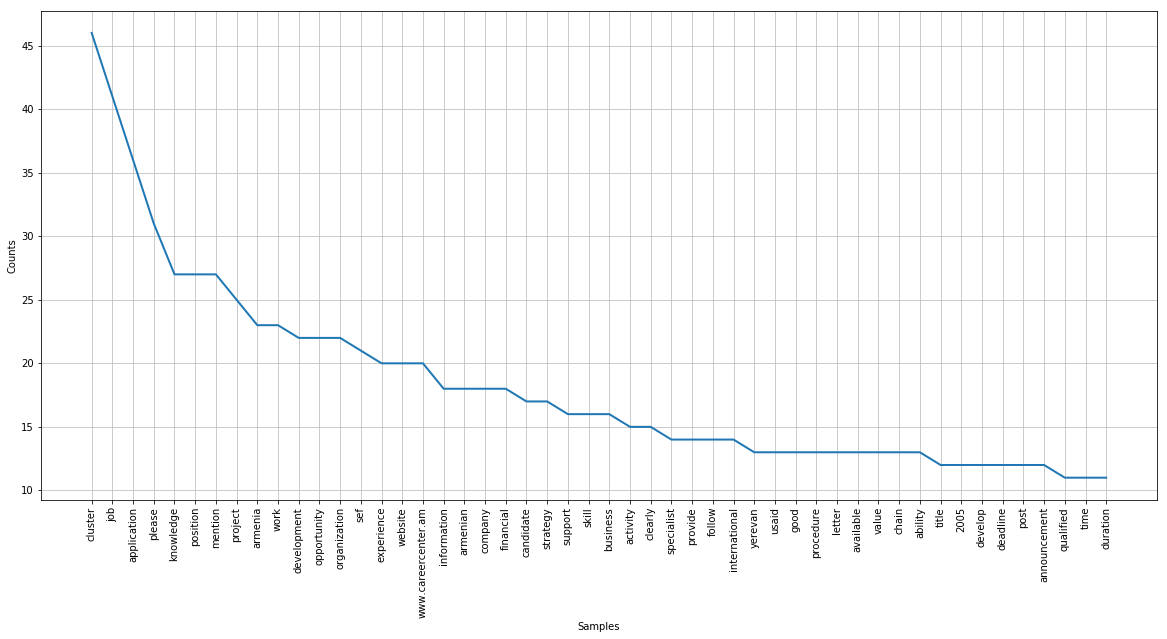

In [51]:
tokens = preprocess(cluster0_tokens)
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

[10294  5980  5690  6600 13732  6491  3946  7151 14229  7195]


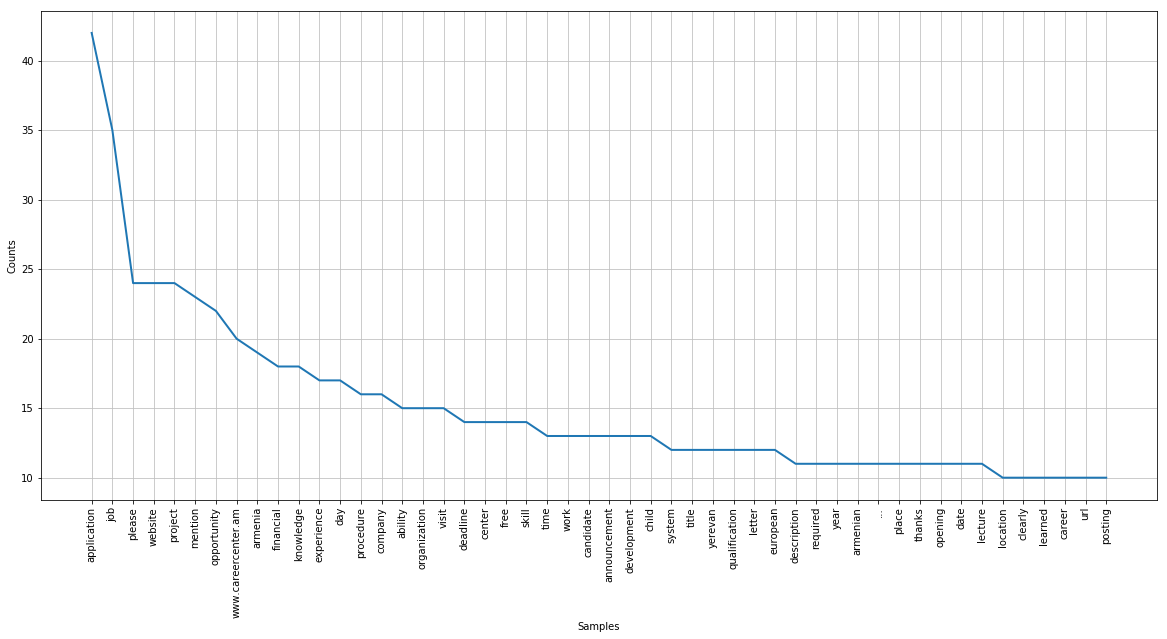

In [52]:
print(top10docclusters[1])
cluster1_tokens = []
for docidx in top10docclusters[1]:
    cluster1_tokens = cluster1_tokens + df['jobpost_token'][docidx]

tokens = preprocess(cluster1_tokens)
plt.figure(figsize=(20, 9))
fd = nltk.FreqDist(tokens)  # case sensitive!
fd.most_common(50)
fd.plot(50)

No luck between cluster 0 and cluster 1, what's up?